In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

In [17]:
mnist = tf.keras.datasets.mnist


(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

loss, accuracy = model.evaluate(x_test, y_test)

print(accuracy)
print(loss)

model.save('digits.keras')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8612 - loss: 0.4707
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9645 - loss: 0.1106
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9777 - loss: 0.0720
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9665 - loss: 0.0987
0.9718000292778015
0.08826430886983871


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The most probable result: 0


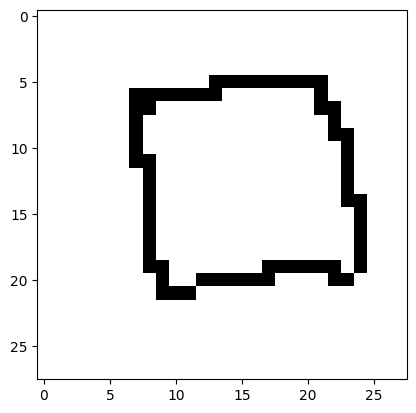

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The most probable result: 1


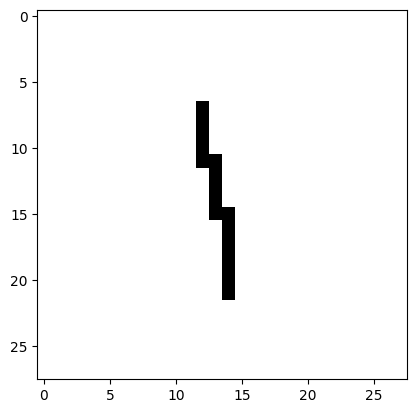

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The most probable result: 2


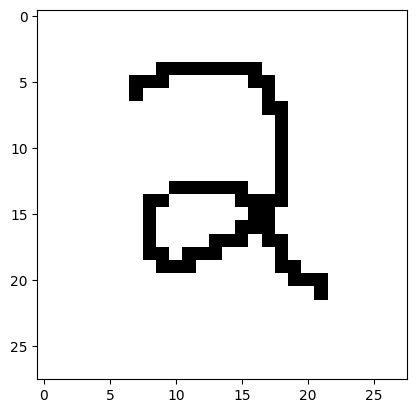

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The most probable result: 3


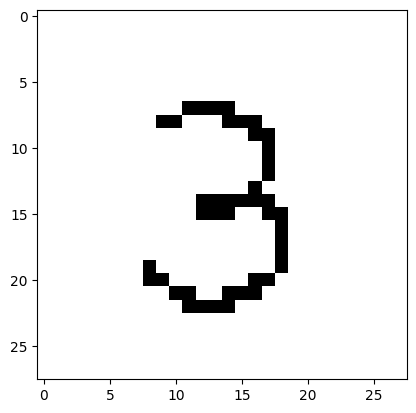

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The most probable result: 4


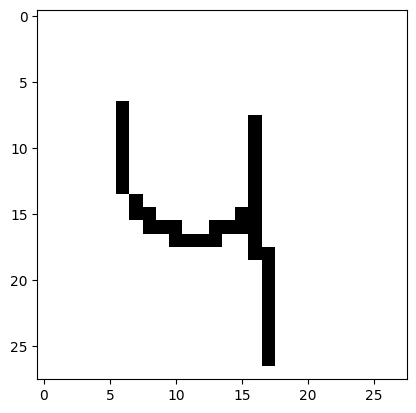

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The most probable result: 5


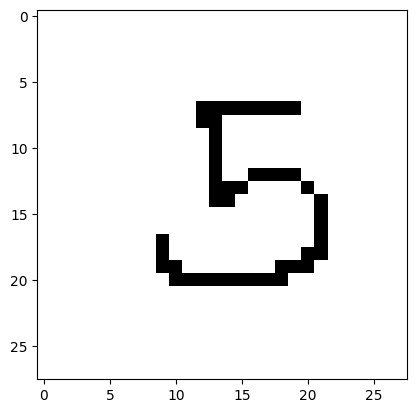

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The most probable result: 6


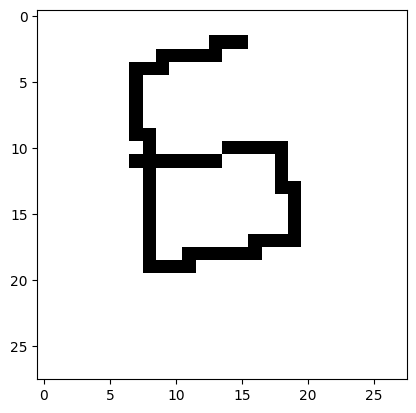

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The most probable result: 7


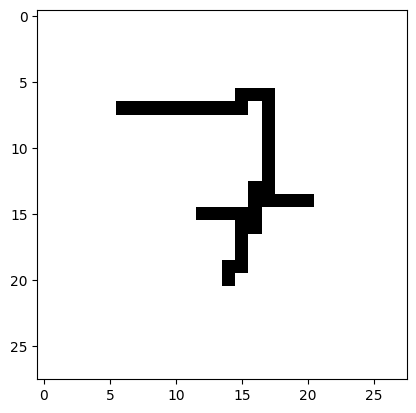

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The most probable result: 8


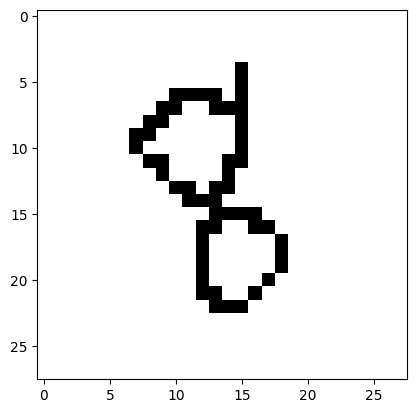

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The most probable result: 9


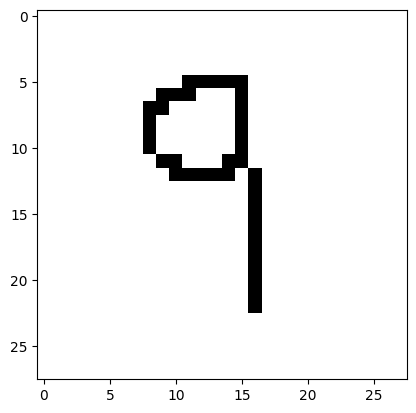

In [24]:
for i in range(0,10):
  img = cv.imread(f'{i}.png')[:,:,0]
  img = np.invert(np.array([img]))
  prediction = model.predict(img)
  print(f'The most probable result: {np.argmax(prediction)}')
  plt.imshow(img[0], cmap = plt.cm.binary)
  plt.show()